## Image Segmentation
- Segmentation partitions an image into regions having similar visual appearance corresponding to different parts of objects
- We extract 'K' most dominant colors from image using k-means clustering
- Then, we re-assign each pixel to nearest of the K colors, leading to segmentation

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

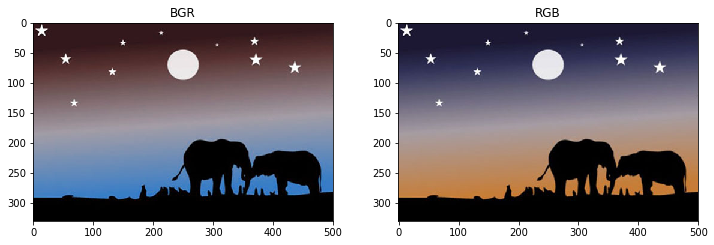

In [2]:
img = cv2.imread('elephant.jpg')             # Reads the image in BGR format
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title("BGR")
plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Convert to RGB
plt.subplot(222)
plt.title("RGB")
plt.imshow(img)
plt.show()

In [3]:
print(img.shape)     # Image of dimensions 330x500 and 3 color channels
print(type(img))

(330, 500, 3)
<class 'numpy.ndarray'>


In [4]:
# Flatten the image such that entire 330*500 pixels are flattened into one row, and we have one such row for each color
# channel

original_shape = img.shape
print(original_shape)
img = img.reshape((-1, 3))    # Or, we can say (330*500, 3) ie, (165000,3)
print(img.shape)     

(330, 500, 3)
(165000, 3)


In [5]:
dominant_colors = 6

km = KMeans(n_clusters = dominant_colors)

In [6]:
km.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
print(km.cluster_centers_)

[[ 37.13144266  34.32688952  63.43515108]
 [159.95092512 144.08287525 144.75717527]
 [  1.48395319   0.8304368    1.15232881]
 [189.03952261 132.37580904  83.16011017]
 [232.74329359 232.43703428 236.72876304]
 [ 93.09919334  90.2027699  114.88279495]]


In [8]:
centers = np.array(km.cluster_centers_, dtype='uint8')
print(centers)
# We take 8-bit unsigned integer as we can represent colors in range 0-255 using 8 bits

[[ 37  34  63]
 [159 144 144]
 [  1   0   1]
 [189 132  83]
 [232 232 236]
 [ 93  90 114]]


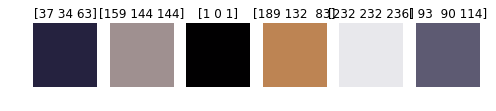

In [9]:
# Plotting these 4 most dominant colors

i = 1
colors = []
plt.figure(0, figsize=(8,2))

for each_color in centers:
    plt.subplot(1, dominant_colors, i)       # (1, 4, i) => in a subplot of 1x4 (1 row, 4 cols) plot at ith cell
    plt.axis("off")
    plt.title(each_color)
    colors.append(each_color)
    
    # Color Swatch - A patch of size 100x100 and 3 color channels to represent each of the 4 dominant colors
    a = np.zeros((100,100,3), dtype='uint8')    
    a[:,:,:] = each_color
    plt.imshow(a)
    i = i+1

#### Segmenting

In [10]:
new_img = np.zeros((330*500, 3), dtype='uint8')
print(new_img.shape)

(165000, 3)


In [11]:
print(colors)

[array([37, 34, 63], dtype=uint8), array([159, 144, 144], dtype=uint8), array([1, 0, 1], dtype=uint8), array([189, 132,  83], dtype=uint8), array([232, 232, 236], dtype=uint8), array([ 93,  90, 114], dtype=uint8)]


In [12]:
print(km.labels_.shape)
print(km.labels_)             # List of predicted cluster for each pixel (ie, which color this pixel is nearest to)
print(km.labels_[8000:8100])

(165000,)
[0 0 0 ... 2 2 2]
[0 0 0 0 0 0 0 0 0 5 4 4 4 4 4 4 4 4 4 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]

In [14]:
print(new_img.shape)
new_img = new_img.reshape(original_shape)
print(new_img.shape)

(165000, 3)
(330, 500, 3)


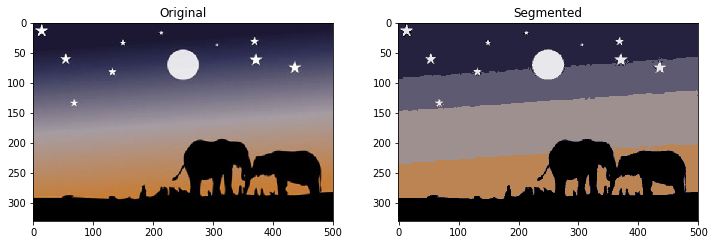

In [15]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title("Original")
plt.imshow(img.reshape(original_shape))

plt.subplot(222)
plt.title("Segmented")
plt.imshow(new_img)
plt.show()

In [21]:
# Extracting stars & moon
stars = np.zeros((330*500,3), dtype='uint8')

for i in range(stars.shape[0]):
    if km.labels_[i] == 4:
        stars[i] = colors[4]

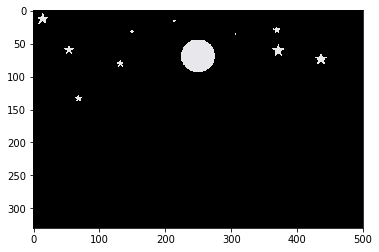

In [22]:
plt.imshow(stars.reshape(330,500,3))

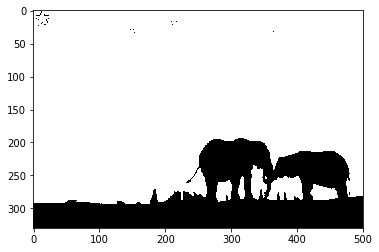

In [23]:
# Extracting elephants

eleph = np.full((330*500,3), 255, dtype='uint8')

for i in range(eleph.shape[0]):
    if km.labels_[i] == 2:
        eleph[i] = colors[2]
        
plt.imshow(eleph.reshape(330,500,3))